# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=metric"

In [6]:
city_lst = []

x=0

for name in cities:
        try:
            city_data = requests.get(url+"&appid="+api_key+"&q="+str(name)).json() 
            city_lst.append([city_data["name"], city_data["main"]["temp"],
                             city_data["main"]["humidity"], city_data["clouds"]["all"],
                             city_data["wind"]["speed"], city_data["coord"]["lat"],
                             city_data["coord"]["lon"], city_data["sys"]["country"]])
            city_ID = city_data["sys"]
            x=x+1
            print('''
                        City: {0}
                        City Number: {1}
                        ------------'''.format(name,x))
        except:
            print('Missing info...Skip')
            
        


                        City: kargasok
                        City Number: 1
                        ------------

                        City: camacha
                        City Number: 2
                        ------------
Missing info...Skip
Missing info...Skip

                        City: busselton
                        City Number: 3
                        ------------

                        City: hilo
                        City Number: 4
                        ------------

                        City: new norfolk
                        City Number: 5
                        ------------

                        City: rikitea
                        City Number: 6
                        ------------

                        City: mahebourg
                        City Number: 7
                        ------------

                        City: puerto del rosario
                        City Number: 8
                        ------------

                      

In [7]:
city_info_df = pd.DataFrame(city_lst).rename(columns={0: "City",1: "Temperature (C)",2:"Humidity (%)",
                                        3:"Cloudiness (%)", 4:"Wind Speed (mph)", 5:"Latitude Coord.",
                                        6:"Longitude Coord.",7:"Country"})

In [8]:
city_info_df.head()

,City,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude Coord.,Longitude Coord.,Country
0,Kargasok,-22.71,89,0,3.58,59.06,80.87,RU
1,Camacha,16.57,82,75,8.70,33.08,-16.33,PT
2,Busselton,25.51,29,64,4.74,-33.64,115.35,AU
3,Hilo,27.12,62,90,4.10,19.71,-155.08,US
4,New Norfolk,12.59,58,40,9.80,-42.78,147.06,AU


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature (C)')

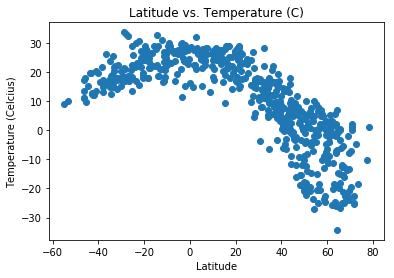

In [21]:
scat1 = plt.scatter(x = city_info_df["Latitude Coord."],
                    y = city_info_df["Temperature (C)"])

plt.xlabel('Latitude')
plt.ylabel('Temperature (Celcius)')
plt.title('Latitude vs. Temperature (C)')

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity (%)')

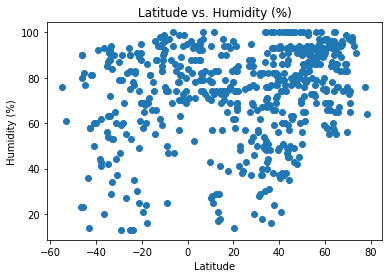

In [17]:
scat2 = plt.scatter(x = city_info_df["Latitude Coord."],
                    y = city_info_df["Humidity (%)"],)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%)')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness (%) vs. Latitude')

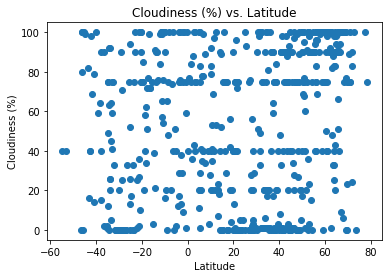

In [22]:
scat3 = plt.scatter(x = city_info_df["Latitude Coord."],
                    y = city_info_df["Cloudiness (%)"])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed (mph) vs. Latitude')

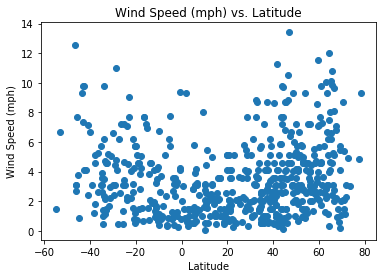

In [23]:
scat1 = plt.scatter(x = city_info_df["Latitude Coord."],
                    y = city_info_df["Wind Speed (mph)"],)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude')